In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load Dataset
df = pd.read_csv('stock_data.csv')

# Display first few rows
print(df.head())

       Date   Open   High    Low  Close    Volume  Name
0  1/3/2006  39.69  41.22  38.79  40.91  24232729  AABA
1  1/4/2006  41.22  41.90  40.77  40.97  20553479  AABA
2  1/5/2006  40.93  41.73  40.85  41.53  12829610  AABA
3  1/6/2006  42.88  43.57  42.80  43.21  29422828  AABA
4  1/9/2006  43.10  43.66  42.82  43.42  16268338  AABA


In [3]:
# Data Preprocessing

# Convert date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df = df.sort_values('Date')

# Set date as index
df.set_index('Date', inplace = True)

# Check null values
print(df.isnull().sum())

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64


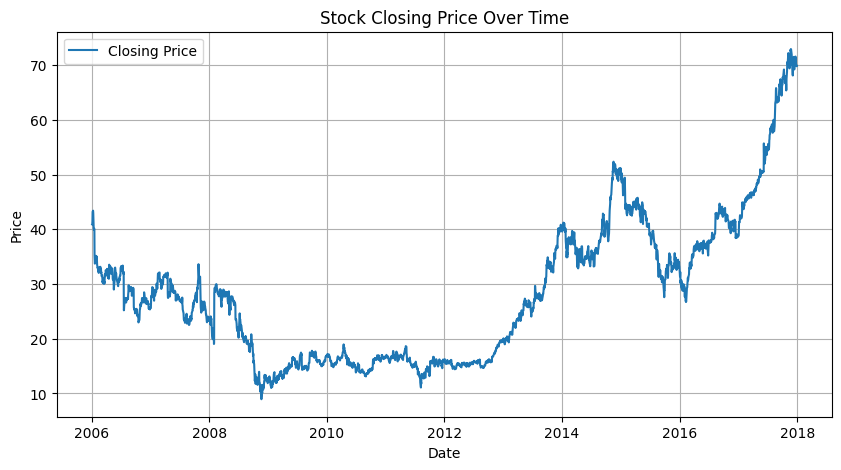

In [4]:
# Data Visualization
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Closing Price')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#  Feature Engineering
n = 5  # Number of previous days used to predict

X, y = [], []
close_prices = df['Close'].values

for i in range(n, len(close_prices)):
    X.append(close_prices[i-n:i])
    y.append(close_prices[i])

X = np.array(X)
y = np.array(y)

print("Feature shape:", X.shape)
print("Label shape:", y.shape)

Feature shape: (3014, 5)
Label shape: (3014,)


In [6]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [7]:
# Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Prediction
y_pred = model.predict(X_test)

In [14]:
# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Root Mean Squared Error (RMSE): 0.7368612624902601
R² Score: 0.9964427684621121


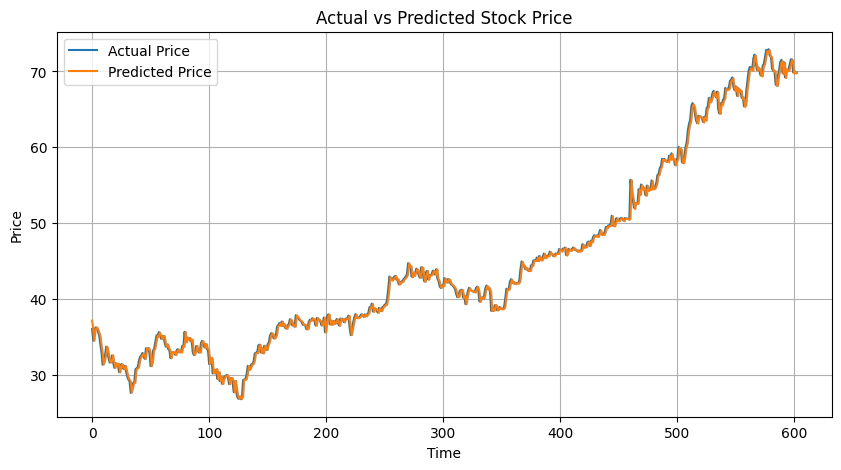

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title('Actual vs Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Predict Next Day Price
latest_data = close_prices[-n:].reshape(1, -1)
next_day_price = model.predict(latest_data)
print("Predicted next day price:", next_day_price[0])

Predicted next day price: 69.79511933800634
